**this is a template notebook for Assignment 3 on Classification. To get a 60 you will need to complete chapter 1.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>\<Title of your notebook>
Author: <span style='background:yellow'>\<jaimy monsuur\></span><br>
Student number: <span style='background:yellow'>\<y668040\></span><br>
Date: <span style='background:yellow'>\<04/04/2023\></span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [1]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')

# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')

# sklearn
# !pip install scikit-learn
import sklearn

# seaborn
try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('seaborn was not installed, installed and imported')


NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
seaborn already installed, only imported


# 1. The Soccer Classification

In the Jupyter Notebook from lecture 6 there was one exercise using the k-means clustering, using the Soccer data. In this chapter we'll repeat that and also see how the other models perform with this data.

First we'll need to load the data itself.

In [2]:
# enter code to load the Soccer2019C.csv file
data = pd.read_csv('Soccer2019C.csv')
data.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
2,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
3,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91,34,27,22,11,12,6,8,8,€172.1M
4,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,84,23,20,20,5,4,4,5,8,€153.5M


We were interested to find any classes in 'Finishing' and 'HeadingAccuracy'. So lets select those from the data.

In [3]:
# enter code to select the two variables, make sure to also remove the missing values.
selectedData = data[['Finishing', 'HeadingAccuracy']].dropna()
selectedData.head()


,Finishing,HeadingAccuracy
0,87,62
1,95,70
2,82,55
3,84,61
4,84,68


A visual might be nice, so lets show the scatterplot of these two:

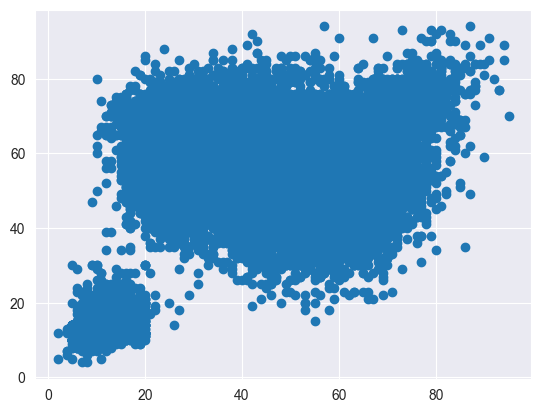

In [4]:
# code to create the scatterplot
plt.scatter(selectedData['Finishing'], selectedData['HeadingAccuracy'])


**<span style='background:yellow'>\<describe what you see, how many clusters would we expect?></span>**

I see a scatter plot with a lot of points.
I think that there are two clusters, one rather large and one that is smaller.

Now that we have the data, lets begin with the classification.

# 1.1. K-Means

The first, and probably most famous, technique discussed was the k-means. 

**<span style='background:yellow'>\<explain how k-means technique works in your own words></span>**.
k-means is an algorithm that tries to find clusters in the data. It does this by randomly selecting a number of points (k) and then tries to find the best cluster for each point. It does this by calculating the distance between the points and the cluster center. The point is then assigned to the cluster with the smallest distance. The cluster center is then recalculated. This process is repeated until the cluster centers no longer change position.

PRO:
- The algorithm can work well for finding clusters with spherical shapes and similar sizes.
- It is easy to implement and understand.

CON:
- K-means assumes that all dimensions of the data are equally important, which may not always be the case.


Steps: of how k-means works are inlustrated in the image below. it first starts with random kpoints, and assigns each point to the closest cluster. then it recalculates the cluster centers and repeats the process until the cluster centers no longer change position.
<img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png" alt="Alternative text" />
<br>Source: stanford.edu



We think there are two clusters, so lets first use that and set the k-means model using k=2. We'll use Elkan's algorithm, rather than full just to speed things along.

In [5]:
# code to create and fit the k-means model (with elkan and full) 
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=2, algorithm='elkan', random_state=0).fit(selectedData)
kmeans.fit(selectedData)

kmeansFull = KMeans(init='random', n_clusters=2, algorithm='lloyd', random_state=0).fit(selectedData)
kmeansFull.fit(selectedData)

C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

KMeans(init='random', n_clusters=2, random_state=0)

Great, now lets see the result...

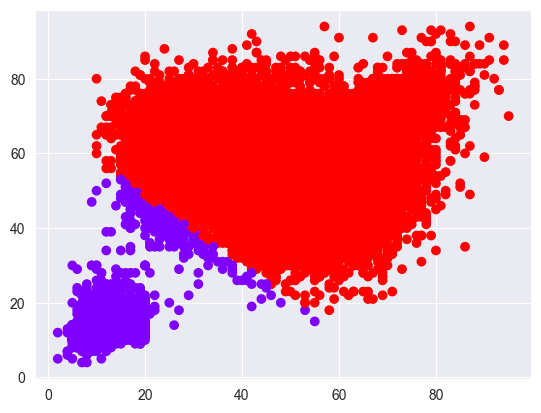

In [6]:
# code to create scatterplot with the classification
plot1 = plt.scatter(selectedData['Finishing'], selectedData['HeadingAccuracy'], c=kmeans.labels_, cmap='rainbow')

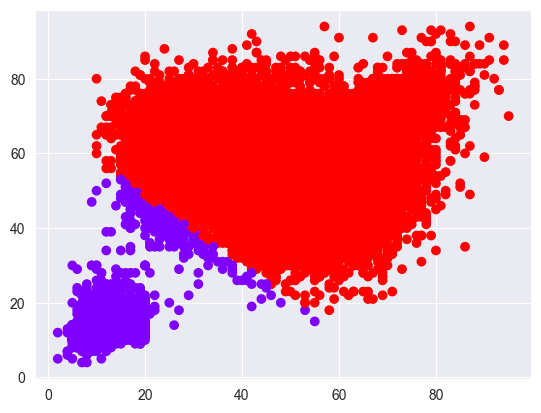

In [7]:
plot2 =plt.scatter(selectedData['Finishing'], selectedData['HeadingAccuracy'], c=kmeansFull.labels_, cmap='rainbow')

**<span style='background:yellow'>\<describe the result, is it what you'd hoped for? Explain why this might be (think of how k-means works)></span>**
well.... it dit find two clusters but i would not say that it did a good job. now that is think about it this was to be expected. one of the clusters is so big that some points on its edges are closer to the center of the small cluster. this causes those points to be classified as part of the small cluster.

Perhaps another initialization method works better. K-means++ is quite popular. 

**<span style='background:yellow'>\<explain briefly how k-means++ is different from k-means in your own words></span>**.
The k-means++ algorithm is a variation of the k-means algorithm that tries to address the problem of suboptimal initial cluster centroids. Instead of completely randomizing the initial centroids, k-means++ takes a more strategic approach to selecting them.

The k-means++ algorithm starts by randomly selecting one point from the dataset as the first cluster centroid. The second centroid is then chosen by selecting the point that is the farthest away from the first centroid

This increases the chanse of finding the best cluster centers.

Lets see:

C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


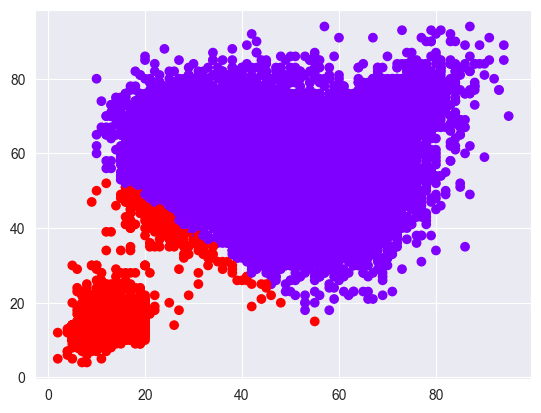

In [8]:
# code to create and fit the k-means++ (elkan) and also show the scatterplot
kmeansPlusPlus = KMeans(init='k-means++', n_clusters=2, algorithm='elkan', random_state=0)
kmeansPlusPlus.fit(selectedData)
plot3 = plt.scatter(selectedData['Finishing'], selectedData['HeadingAccuracy'], c=kmeansPlusPlus.labels_, cmap='rainbow')


**<span style='background:yellow'>\<describe the result, is it what you'd hoped for?></span>**
not really, there are only 2 clusters so i did not expect it to be better than the other two.  because kmeans++ does not change the fact that the edges of the big cluster are closer to the center of the small one.

Perhaps the k=2 is wrong. We could try to iterate over different values of k and measure the performance with a few different metrics.

We'll use the same function as in the Jupyter Notebook from the lecture:

In [9]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [46]:
# copy the elbowPlot function, and if you like you can adjust it.
def elbowPlot(data, model, kRange):

    # set the plotting stage for later
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, constrained_layout=True,figsize=(15,5))

    # Using the Distortion measure:
    visualizer = KElbowVisualizer(model, k=kRange, metric='distortion', ax=ax1)
    chPlot=visualizer.fit(data)
    ax1.set_title('Distortion')

    # Using the Calinski-Harabasz measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='calinski_harabasz', ax=ax2)
    chPlot=visualizer.fit(data)
    ax2.set_title('Calinski-Harabasz')

    # Using the Silhouette measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='silhouette', ax=ax3)
    chPlot=visualizer.fit(data)
    ax3.set_title('Silhouette')

    # Show the results
    plt.show()

Now lets see what this gives for our Soccer data:

C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

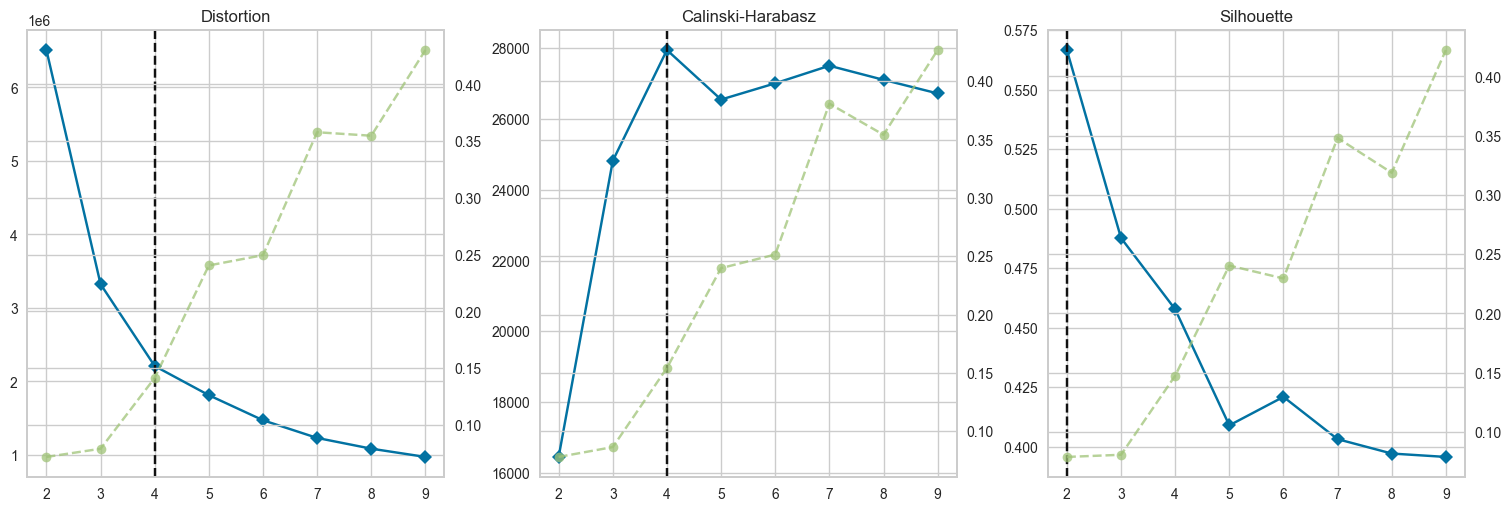

In [11]:
# code to show the three elbow plots (this might take a little time)
elbowPlot(selectedData, kmeansPlusPlus, range(2,10))

**<span style='background:yellow'>\<Explain the results: which k is recommended AND what does 'Distortion', 'Calinski-Harabasz', and 'Silhouette' actually measure (briefly explain the difference in your own words></span>**
two of the three metrics recommend k=4 the other says k=2, so i would say that k=4 is the best choice.

silhouette measures how similar a point is to its own cluster compared to other clusters. the closer to 1 the better.

calinski-harabasz measures how well separated the clusters are. the higher the better.

distortion measures how much the clusters differ from the original points. the lower the better.


Lets see what happens if we use the recommended k value:

C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


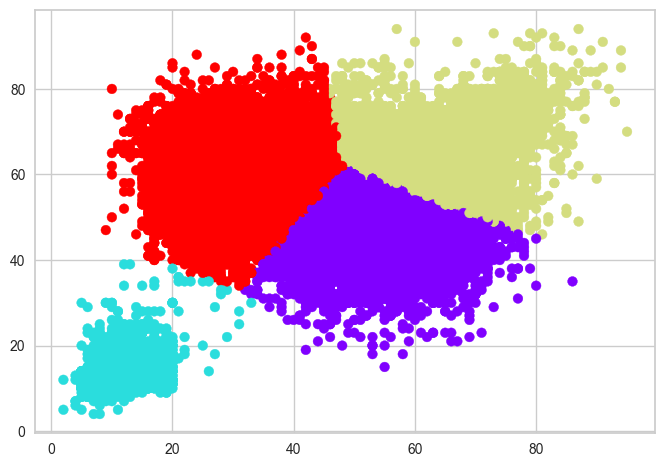

In [12]:
# code to create and fit the k-means++ (full) and also show the scatterplot with the k value from the elbow plot
newKmeansPlusPlus = KMeans(init='k-means++', n_clusters=4, algorithm='elkan', random_state=0)
newKmeansPlusPlus.fit(selectedData)
plot4 = plt.scatter(selectedData['Finishing'], selectedData['HeadingAccuracy'], c=newKmeansPlusPlus.labels_, cmap='rainbow')

**<span style='background:yellow'>\<describe the result, is it what you'd hoped for?></span>**
i would say that these results are actualy pretty good. the clusters are well separated and the points are not classified as part of the wrong cluster. ofcourse i dont know how many clusters there are supposed to be so i cant say if this is the best result possible.

Now lets see if another technique might do better (or worse).

## 1.2. Hierarchical Clustering Analysis (HCA)

The second technique discussed was the Hierarchical Clustering Analysis (HCA). 

**<span style='background:yellow'>\<explain how this technique works in your own words></span>**.
HCA starts by treating each point as its own cluster. then it finds the two closest clusters and merges them. it then finds the two closest clusters again and merges them. it continues this until there is only one cluster left. or until the number of clusters is equal to the number of clusters you want.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200204181551/Untitled-Diagram71.png">
<br>Source: https://www.geeksforgeeks.org/

PROS:
- HCA can provide a visual representation of the clustering structure through dendrograms, which can help in the interpretation of the results.
- has a variety of linkage options, which can be used to determine the distance between clusters.

CONS:
- HCA is computationally expensive, especially for large datasets.
-  sensitive to outliers.



One selection to be made is the so-called 'linkage'. The four basic ones are 'single', 'complete', 'mean', and 'ward'.

**<span style='background:yellow'>\<give a brief description of each of these linkage options></span>**
linkage is the method used to determine the distance between clusters. It determines how clusters are merged together, this can have a significant impact on the found clusters.

single: the distance between two clusters is the distance between the closest points in the clusters.
complete: the distance between two clusters is the distance between the furthest points within the clusters.
mean: the distance between two clusters is the average distance between all points in the clusters.
ward: the distance between two clusters is the variance of the clusters.

In the Jupyter Notebook from the lecture there was a function that can compare these four options in one go. Lets use that here as well.

In [13]:
# copy the compareLinkage function, and if you like you can adjust it.
from sklearn.cluster import AgglomerativeClustering
def compareLinkage(myData, k):
    hca, axs = plt.subplots(2,2, constrained_layout=True)

    hierClust = AgglomerativeClustering(linkage='single', n_clusters=k)
    hierClust.fit(myData)
    axs[0,0].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[0,0].set_title('Single')

    hierClust = AgglomerativeClustering(linkage='average', n_clusters=k)
    hierClust.fit(myData)
    axs[0,1].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[0,1].set_title('Average')

    hierClust = AgglomerativeClustering(linkage='complete', n_clusters=k)
    hierClust.fit(myData)
    axs[1,0].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[1,0].set_title('Complete')

    hierClust = AgglomerativeClustering(linkage='ward', n_clusters=k)
    hierClust.fit(myData)
    axs[1,1].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[1,1].set_title('Ward')

    plt.show()

Now lets use it on the Soccer data. We assumed there to be 2 clusters, so we'll stick with our k = 2 for now.

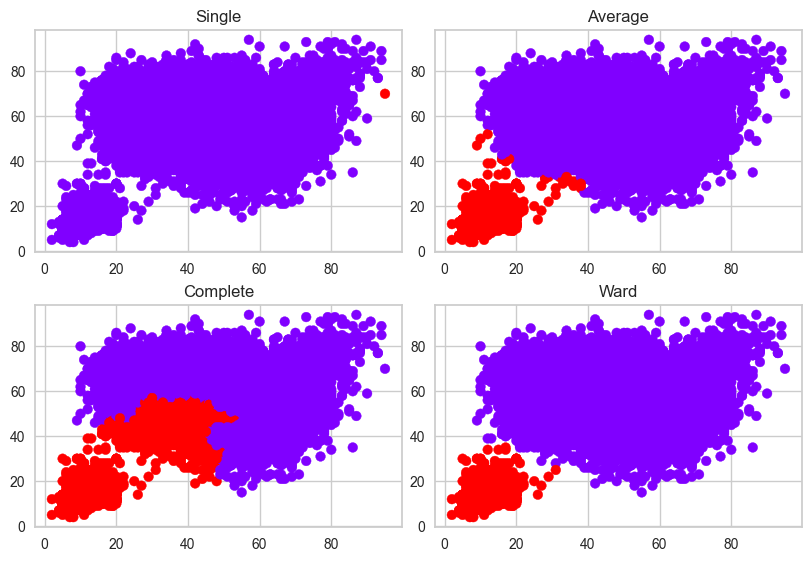

In [14]:
# code to create the four HCA linkage models and scatterplot (use the function)
myData = selectedData.to_numpy()
compareLinkage(myData, 2)

**<span style='background:yellow'>\<what do you notice? Are they all the same? What might cause the differences?></span>**
they are not all the same. The single linkage is performed awful. one of the clusters is a single dot.the average linkage actually performed pretty good, it only classified a bit of the data wrong.
The complete linkage performed not so good, it has results similar to the kmeans results. a lange part of the bigger cluster is classified as part of the smaller cluster.
The ward linkage performed the best. it classified all the data the same as i would have done.

Would the k = 2 perhaps again be different? Lets find out. We can use our 'elbowPlot' function here as well.

single


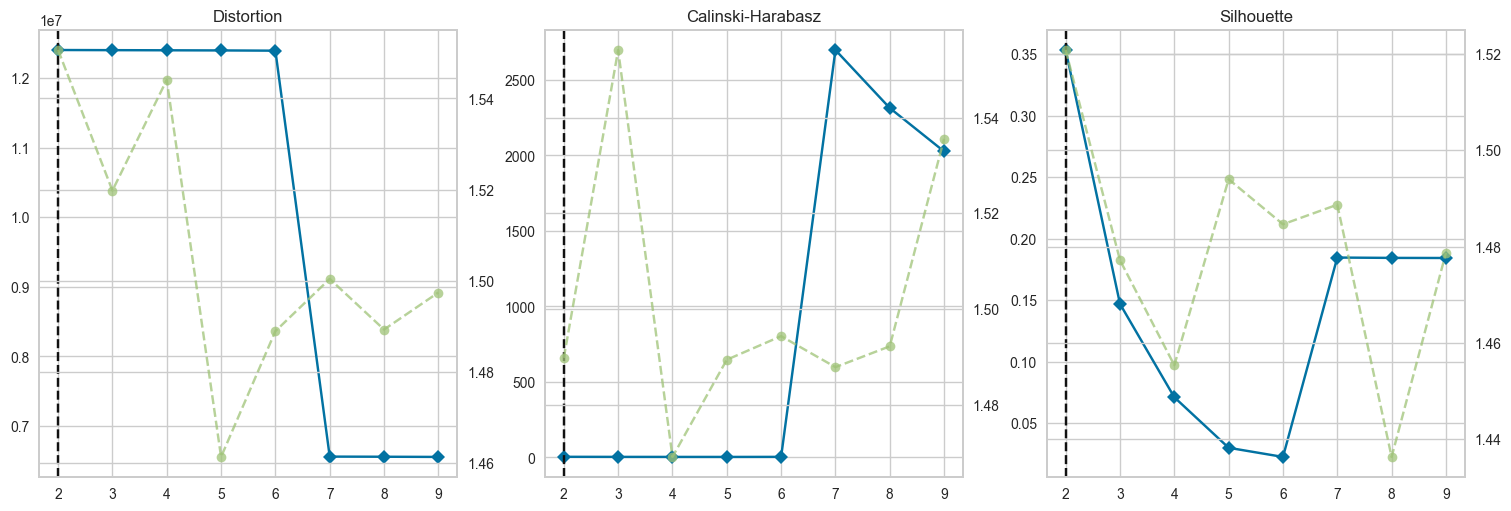

average


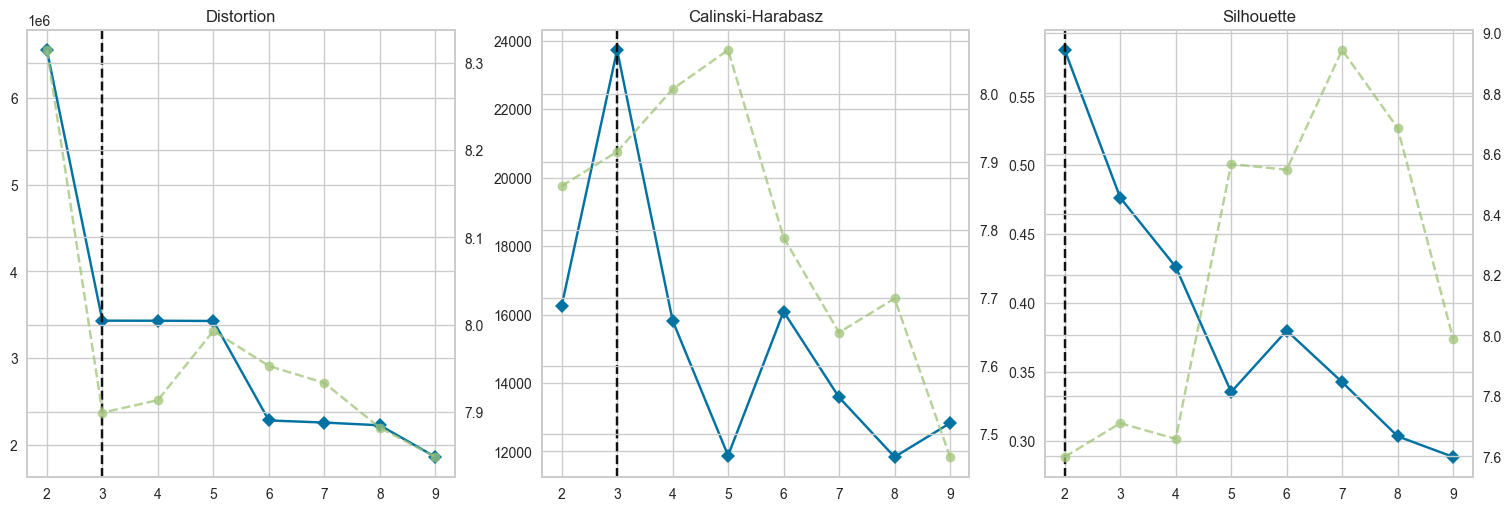

complete


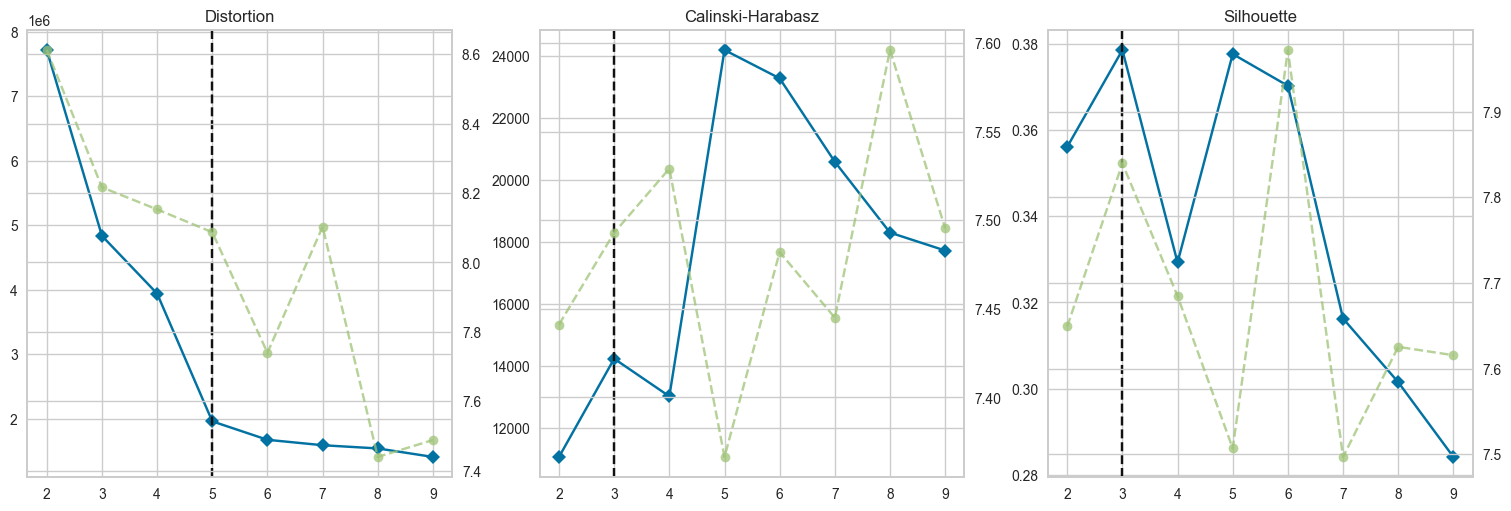

ward


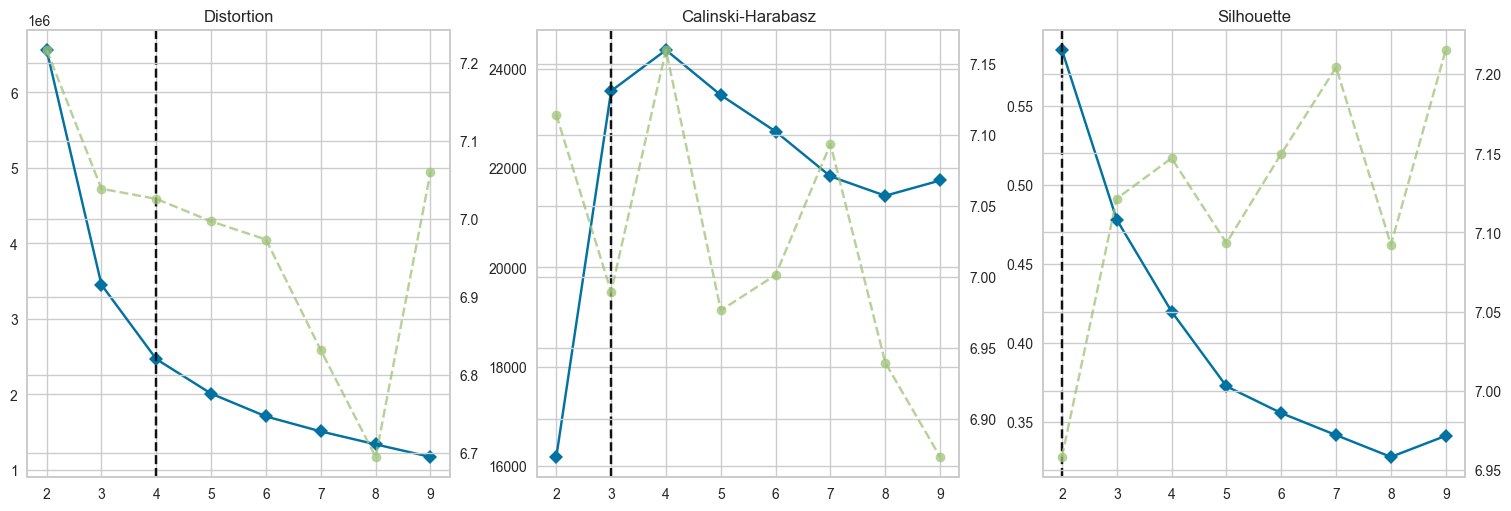

In [15]:
# code to run the elbowPlot four times (ones for each different linkage) (this might take quite some time)
# print something between so you know which output belongs to which linkage
print ("single")
hierClust = AgglomerativeClustering(linkage='single')
elbowPlot(myData, hierClust, range(2, 10))
print ("average")
hierClust = AgglomerativeClustering(linkage='average')
elbowPlot(myData, hierClust, range(2, 10))
print ("complete")
hierClust = AgglomerativeClustering(linkage='complete')
elbowPlot(myData, hierClust, range(2, 10))
print ("ward")
hierClust = AgglomerativeClustering(linkage='ward')
elbowPlot(myData, hierClust, range(2, 10))

**<span style='background:yellow'>\<are there any other suggestions for k than 2? What seems to be the most common suggestion (the modal suggestion)?></span>**

the most common suggestion is 3. the single linkage suggests 2, the average linkage suggests 3, the complete linkage suggests 3 and the ward linkage suggests 2,3,4.

A few different k-s are suggested by the elbow plot. Lets see how our HCA performs if we use those.

single


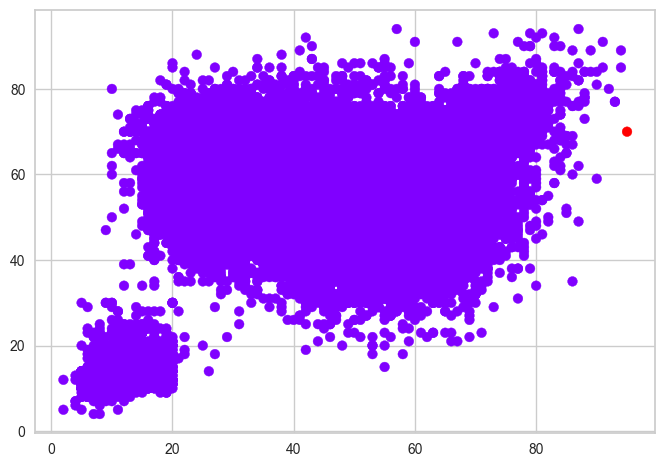

average


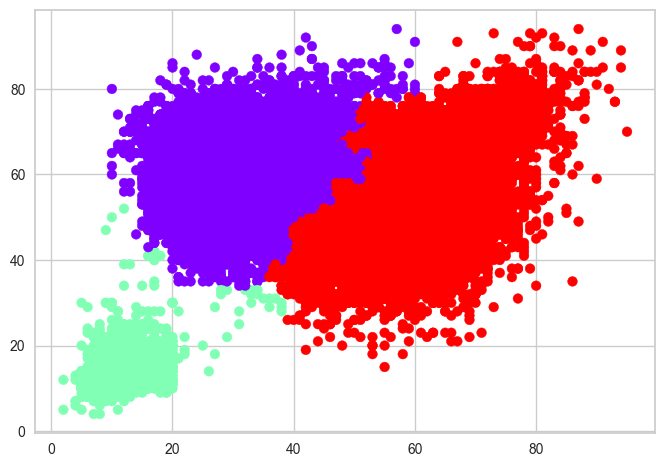

complete


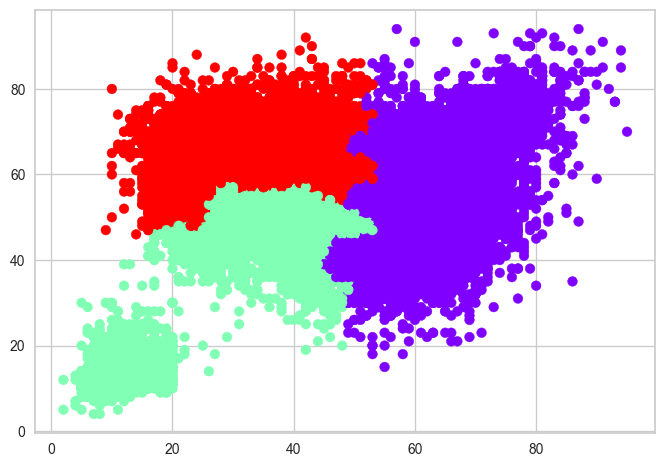

ward


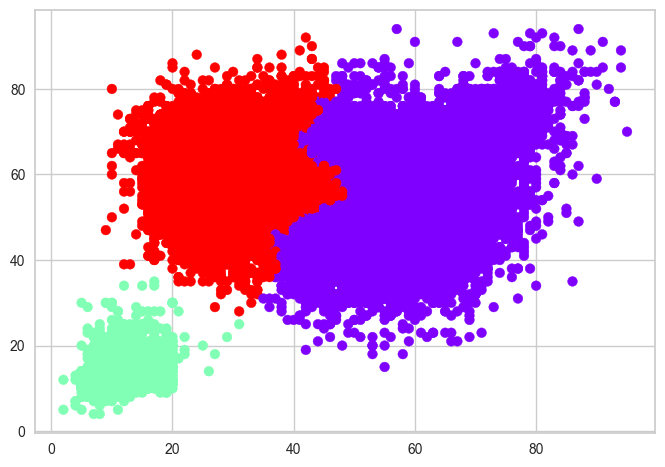

ward 2


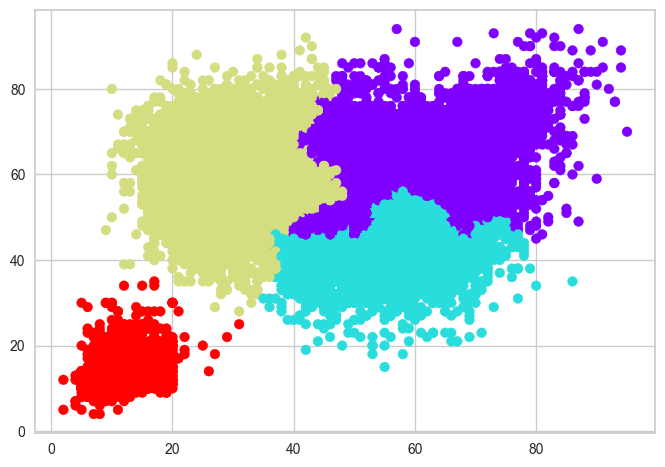

In [16]:
# code to show the four linkages for the different suggested k's from the elbow plots.
print ("single")
hierClust1 = AgglomerativeClustering(linkage='single', n_clusters=2)
hierClust1.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust1.labels_, cmap='rainbow')
plt.show()
print ("average")
hierClust2 = AgglomerativeClustering(linkage='average', n_clusters=3)
hierClust2.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust2.labels_, cmap='rainbow')
plt.show()
print ("complete")
hierClust3 = AgglomerativeClustering(linkage='complete', n_clusters=3)
hierClust3.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust3.labels_, cmap='rainbow')
plt.show()
print ("ward")
hierClust4 = AgglomerativeClustering(linkage='ward', n_clusters=3)
hierClust4.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust4.labels_, cmap='rainbow')
plt.show()
print ("ward 2")
hierClust5 = AgglomerativeClustering(linkage='ward', n_clusters=4)
hierClust5.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust5.labels_, cmap='rainbow')
plt.show()


#




complete


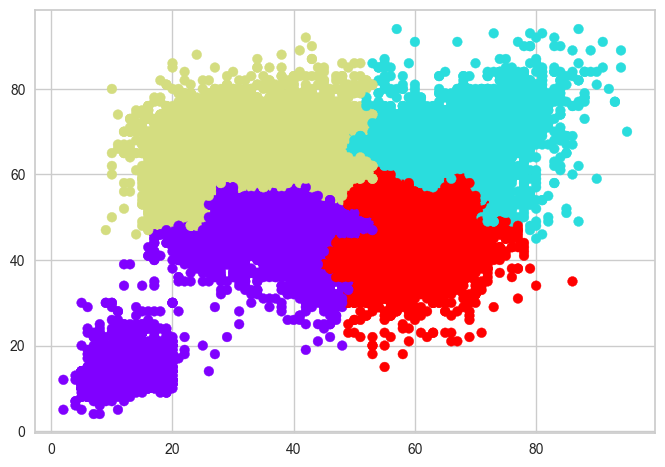

In [17]:
# to compare complete with kmeans
print ("complete")
hierClust3 = AgglomerativeClustering(linkage='complete', n_clusters=4)
hierClust3.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust3.labels_, cmap='rainbow')
plt.show()

**<span style='background:yellow'>\<what can be concluded from the result? how did HCA compare to our k-means></span>**
single linkage: still performs awful.
the average linkage: performs pretty good.
the complete linkage: performs not so good.
the ward linkage: performs the best in probably both cases.

i think that average linkage and ward would be best in this case, i think that kmeans is better than the complete linkage, but ward is probably better than kmeans. this because the cluster seem to be a bit better to me.

The dendrogram is also often used. Lets at least produce it once.

In [18]:
!pip install scipy
from scipy.cluster.hierarchy import dendrogram, linkage

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


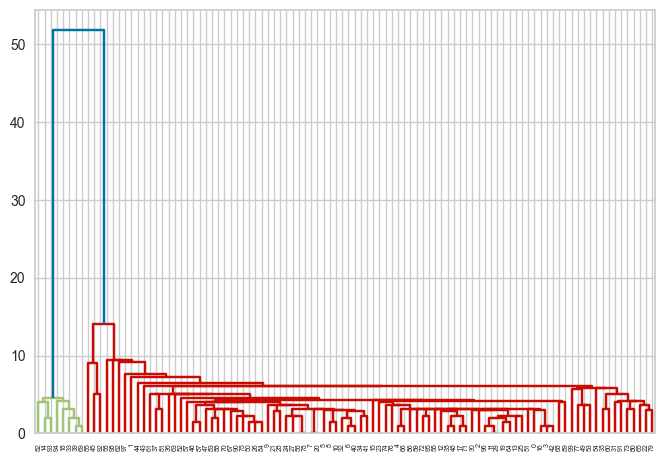

In [19]:
# code to show at least one dendrogram. (if your kernel crashes on this, show a dendrogram of a selected portion of the data) it did indeed break my kernel, so i will show a dendrogram of a selected portion of the data.
smallData = myData[0:100]
single = linkage(smallData, 'single')
dendrogram(single)
plt.show()

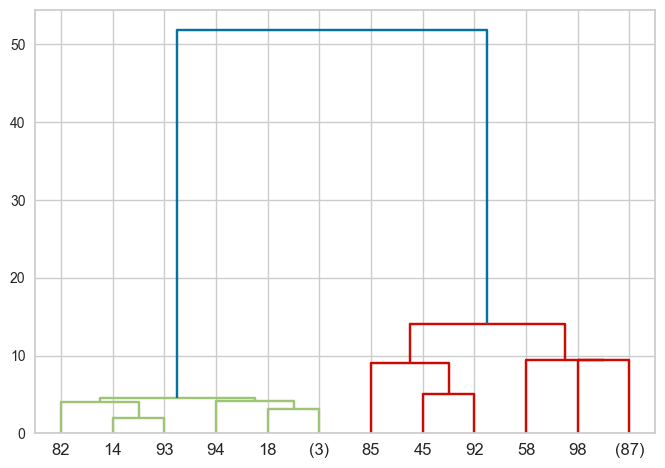

In [20]:
# if dendrogram is too large, code to zoom in.
dendrogram(single, p=3, truncate_mode='level')
plt.show()


Allright, two techniques down, lets move on to the third...

## 1.3. DBSCAN

The third technique discussed was the Density Based Spatial Clustering of Applications with Noise (DBSCAN).

**<span style='background:yellow'>\<explain how this technique works in your own words></span>**.
DBSCAN is a density based clustering method. It looks at the density of the points around a chosen point. If the density is high enough, it will be considered a core point. If the density is not high enough, it will be considered a border point. If the density is too low, it will be considered noise . The density is determined by the epsilon and the min number of samples. The epsilon is the distance between the points. The min number of samples is the minimum number of points that need to be in the epsilon distance of a point to be considered a core point.

This method will require two input parameters. The epsilon and the min number of samples.

As the min number of samples I have chosen for **<span style='background:yellow'>\<30></span>**.

For the epsilon we can create a visual aid using the nearest neighbors.

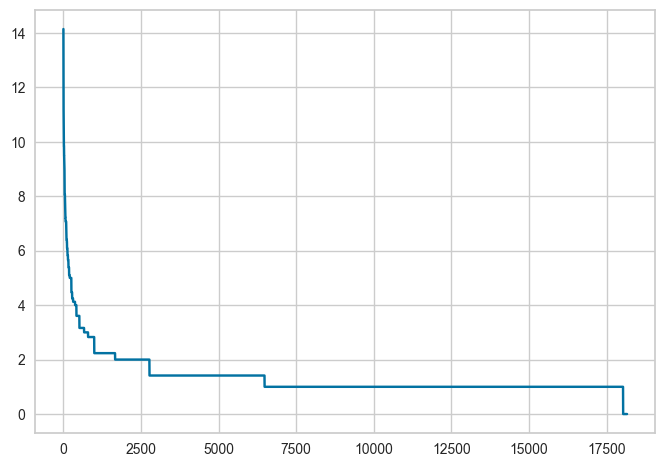

In [21]:
# code to show the nearest neighbors plot with different distances
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
ns=30 # the minimum number of neighbors
nbrs = NearestNeighbors(n_neighbors=ns).fit(myData)
distances, indices = nbrs.kneighbors(myData)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(list(range(1,myData.shape[0]+1)), distanceDec);

**<span style='background:yellow'>\<interpret the result, what would be a good epsilon?></span>**
the elbow is at around 3, so i would choose 3 as epsilon.

Now that we have a min number of points for a neighborhood, and an epsilon we can run the DBSCAN.

In [22]:
# code to create and fit the DBSCAN model.
dbscan = DBSCAN(eps=3,min_samples=30)
dbscan.fit(myData)


DBSCAN(eps=3, min_samples=30)

Lets look at the results:

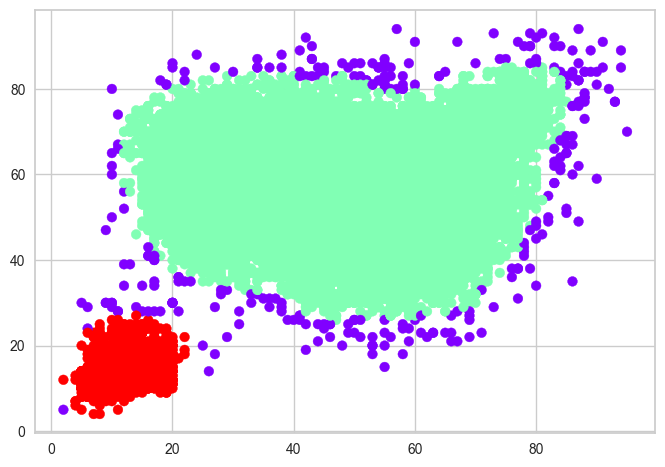

In [23]:
# code to show the scatterplot with the clusters
plt.scatter(myData[:,0],myData[:,1], c=dbscan.labels_, cmap='rainbow');

**<span style='background:yellow'>\<describe the result, how does it compare to the other models, what might cause this></span>**

i would say that the result is pretty good. the difference is that we have point that are not assigned to a cluster.
this is becouse this method alowes for noise. so the points that are not in a cluster are noise. the other methods do not allow for noise, so they will assign them to a cluster.

There was one more technique discussed, the almost perfect HDBSCAN...

## 1.4. HDBSCAN

The fourth technique was the Hierachical Density Based Spatial Clustering of Applications with Noise (HDBSCAN).

**<span style='background:yellow'>\<explain how this technique is different from DBSCAN in your own words></span>**.
DBSCAN does not work well when the density of a cluster is of importance. HDBSCAN can do this. HDBSCAN is a sort of combination of DBSCAN and HCA. HDBSCAN uses the HCA to find the optimal number of clusters. HDBSCAN uses the DBSCAN to find the optimal number of points in a cluster.

PROS:
- can handle datasets with weird shapes and sizes, and does not require the user to specify the number of clusters beforehand.
- Can identify outliers. and noice.

CONS:
- can be computationally expensive with large datasets.


One big advantage of this technique is that it only requires one input parameter: the min samples. We can use the same as from DBSCAN. So lets dive right in.

before we start, we need to install the HDBSCAN package.
conda install -c conda-forge hdbscan

In [24]:
# code to create and fit the HDBSCAN model.
import hdbscan
hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=30, gen_min_span_tree=True)
hdbscanModel.fit(selectedData)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=30)

And the result....

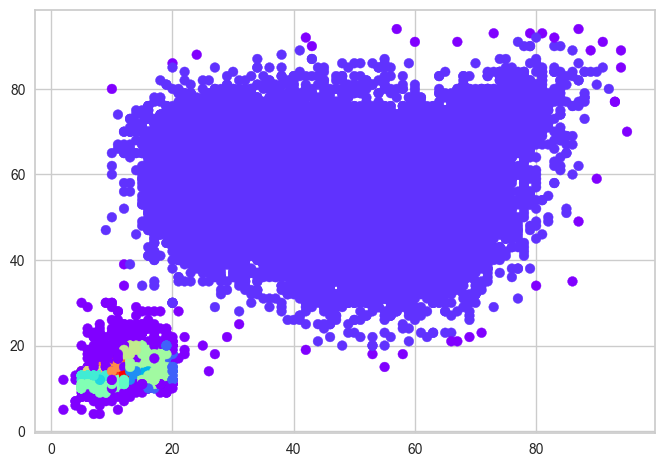

In [25]:
# code to show the scatterplot with the clusters
plt.scatter(selectedData.iloc[:,0],selectedData.iloc[:,1], c=hdbscanModel.labels_, cmap='rainbow');

**<span style='background:yellow'>\<describe the result, how does it compare to the other models></span>**
the big cluster is the same as with the other models. but the small cluster now consist of multiple clusters. this is probably because the HDBSCAN finds the optimal number of clusters. what i did found out is that if i make the min_cluster_sizebigger like 100, then the results are the same as with the other models.

The HDBSCAN actually goes through a few steps: The minimum spanning tree => the dendrogram => the condensed tree.

In the Jupyter Notebook from the lecture, a small function was made to show these. 

In [26]:
# code of the HDBSCANvisuals function, adjust if needed/wanted/improvements.
import seaborn as sns

def HDBSCANvisuals():
    # set the plotting stage for later
    plt.figure(figsize=(10,3))

    plt.subplot(131)
    plt.gca().set_title('Min. Spanning Tree')
    hdbscanModel.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80,edge_linewidth=2)

    plt.subplot(132)
    plt.gca().set_title('Dendrogram')
    hdbscanModel.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

    plt.subplot(133)
    plt.gca().set_title('Condensed Tree')
    hdbscanModel.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

    # Show the results
    plt.show()

So for those who like to see what is going on in these stages:

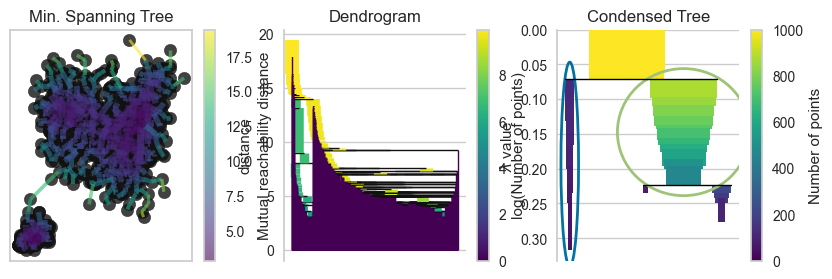

In [27]:
# code using the function to show the three visuals. Note if your kernel crashes with this, you can use a sample set from the data.it did
smallSample = selectedData.sample(1000)
hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=30, gen_min_span_tree=True)
hdbscanModel.fit(smallSample)
HDBSCANvisuals()

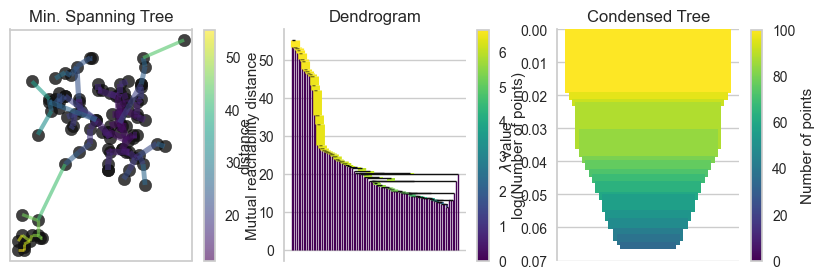

In [28]:
smallSample = selectedData.sample(100)
hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=30, gen_min_span_tree=True)
hdbscanModel.fit(smallSample)
HDBSCANvisuals()

## 1.5. Adjusting the Data

We used the unadjusted data, but often a normalization is used. What would the results have been, if we had first normalized our scores using the StandardScaler.

Lets find out.

First transform the data:

In [29]:
selectedData

,Finishing,HeadingAccuracy
0,87,62
1,95,70
2,82,55
3,84,61
4,84,68
...,...,...
18154,56,49
18155,13,15
18156,21,48
18157,15,11


In [30]:
# code using the StandardScaler to transform the data.
# Import the standardscaler package
from sklearn.preprocessing import StandardScaler

# set the scaler
scaler = StandardScaler()
scaler.fit(selectedData.to_numpy())

# transform
scaledData = scaler.transform(selectedData.to_numpy())
scaledData = pd.DataFrame(scaledData, columns=selectedData.columns)
scaledData

,Finishing,HeadingAccuracy
0,2.122842,0.558238
1,2.532567,1.018552
2,1.866764,0.155463
3,1.969195,0.500699
4,1.969195,0.903474
...,...,...
18154,0.535157,-0.189773
18155,-1.667116,-2.146109
18156,-1.257391,-0.247312
18157,-1.564685,-2.376266


Now lets see all the results again, but using this scaled data.

# <span>This one takes a while to run, so be patient.

KMeans with Elkan


C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


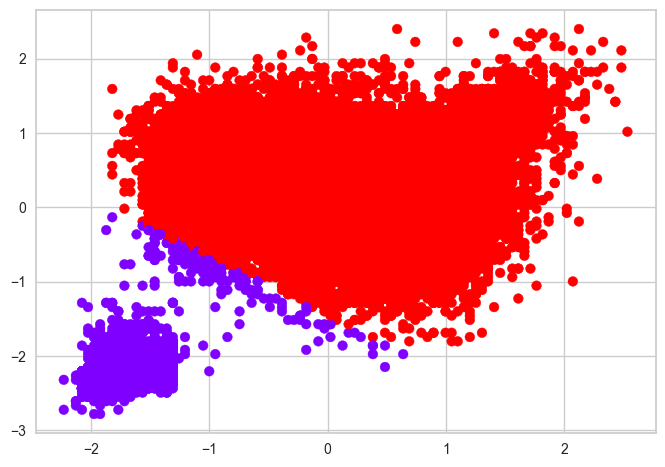

KMeans with Lloyd


C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


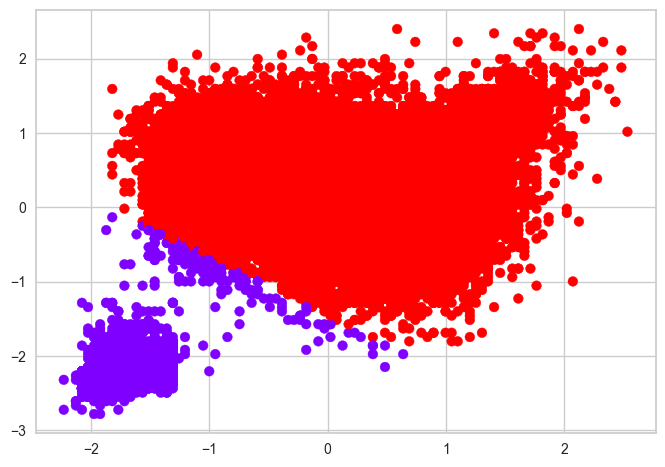

KMeans++ with Elkan
HCA all 4 linkage methods


C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


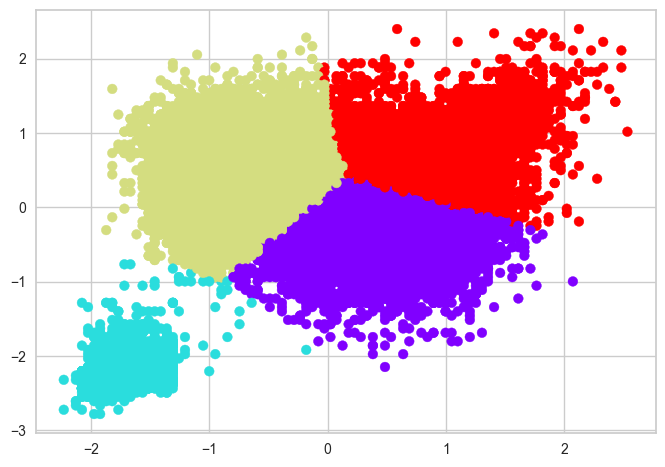

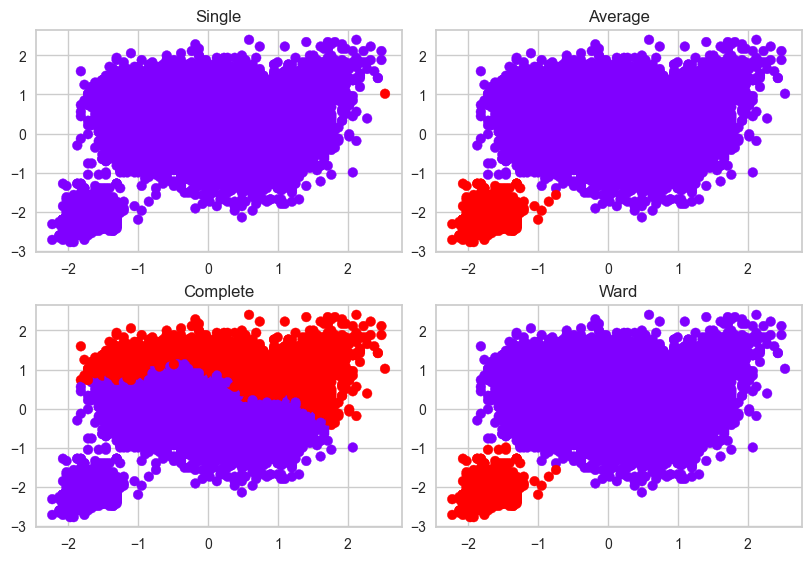

HCA with recommended nr of clusters
now the models
single


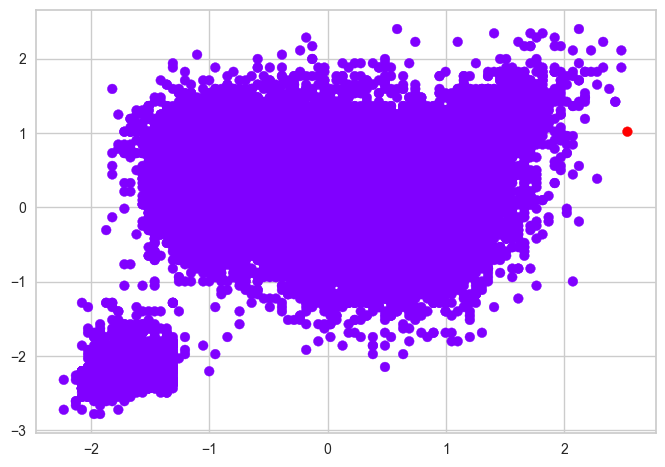

average


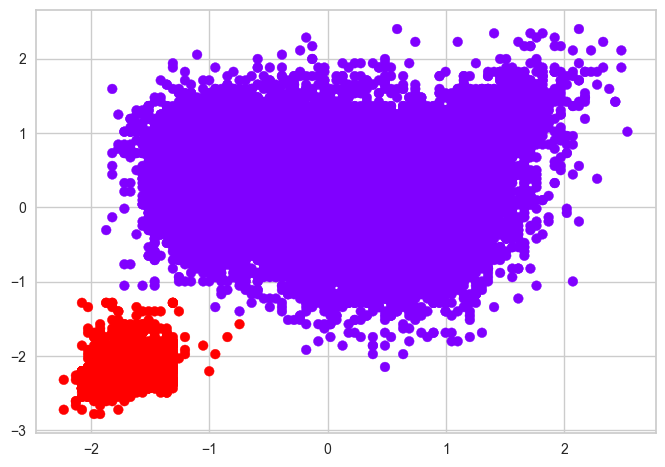

complete


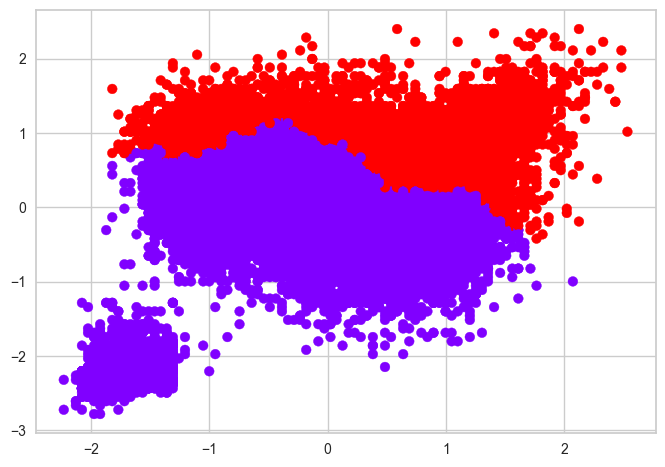

complete 2


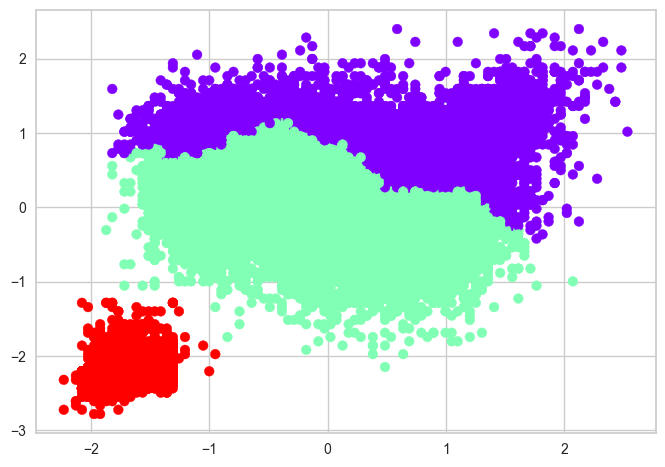

ward 1


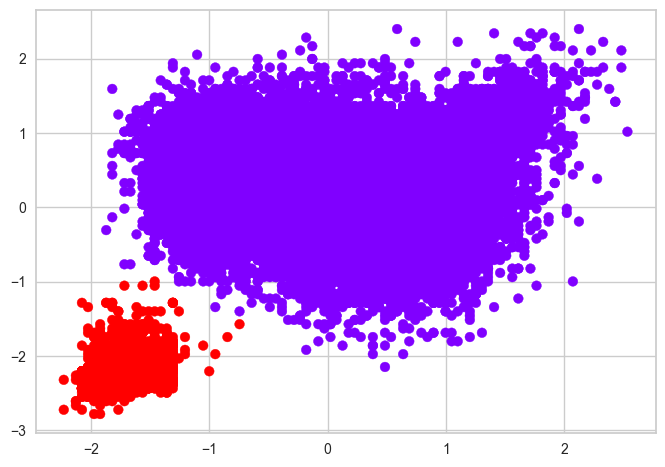

ward 2


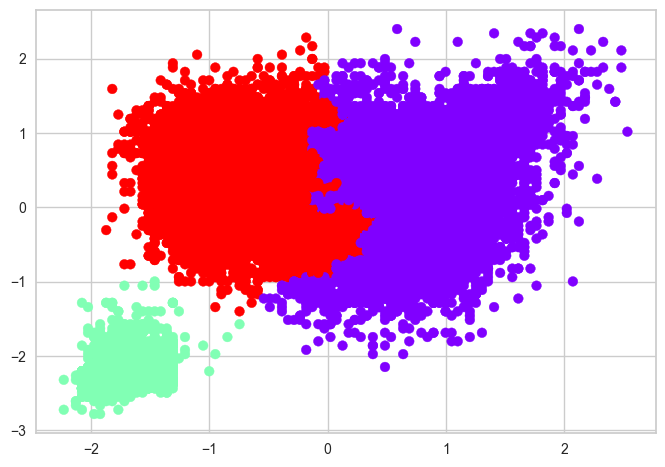

ward 3


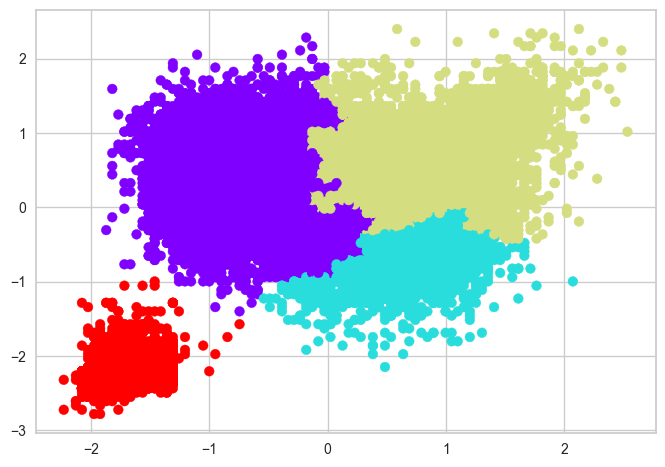

In [31]:
# long code cell with all the different models using the scaled data. Output should each time be the scatterplot.
# you could add some other cells first to find perhaps some parameters.
from sklearn.cluster import KMeans
print("KMeans with Elkan")
kmeans = KMeans(init='random', n_clusters=2, algorithm='elkan', random_state=0).fit(scaledData)
kmeans.fit(scaledData)
plot = plt.scatter(scaledData.iloc[:,0],scaledData.iloc[:,1], c=kmeans.labels_, cmap='rainbow');
plt.show(plot)

print("KMeans with Lloyd")
kmeansFull = KMeans(init='random', n_clusters=2, algorithm='lloyd', random_state=0).fit(scaledData)
kmeansFull.fit(scaledData)
plot2 = plt.scatter(scaledData.iloc[:,0],scaledData.iloc[:,1], c=kmeansFull.labels_, cmap='rainbow');
plt.show(plot2)

print("KMeans++ with Elkan")
kmeansPlusPlus = KMeans(init='k-means++', n_clusters=4, algorithm='elkan', random_state=0)
kmeansPlusPlus.fit(scaledData)
plot3 = plt.scatter(scaledData['Finishing'], scaledData['HeadingAccuracy'], c=kmeansPlusPlus.labels_, cmap='rainbow')

print("HCA all 4 linkage methods")
myData = scaledData.to_numpy()
compareLinkage(myData, 2)

print("HCA with recommended nr of clusters")
# print("getting the recommended nr of clusters")
# print ("single")
# hierClust = AgglomerativeClustering(linkage='single')
# elbowPlot(myData, hierClust, range(2, 10))
# print ("average")
# hierClust = AgglomerativeClustering(linkage='average')
# elbowPlot(myData, hierClust, range(2, 10))
# print ("complete")
# hierClust = AgglomerativeClustering(linkage='complete')
# elbowPlot(myData, hierClust, range(2, 10))
# print ("ward")
# hierClust = AgglomerativeClustering(linkage='ward')
# elbowPlot(myData, hierClust, range(2, 10))
#i have commented this out becouse it takes a long time to run. the results where:
# single: 2
# average: 2
# complete: 3
# ward: 2,3,4
print("now the models")
print ("single")
hierClust1 = AgglomerativeClustering(linkage='single', n_clusters=2)
hierClust1.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust1.labels_, cmap='rainbow')
plt.show()
print ("average")
hierClust2 = AgglomerativeClustering(linkage='average', n_clusters=2)
hierClust2.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust2.labels_, cmap='rainbow')
plt.show()
print ("complete")
hierClust3 = AgglomerativeClustering(linkage='complete', n_clusters=2)
hierClust3.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust3.labels_, cmap='rainbow')
plt.show()
print ("complete 2")
hierClust3 = AgglomerativeClustering(linkage='complete', n_clusters=3)
hierClust3.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust3.labels_, cmap='rainbow')
plt.show()
print ("ward 1")
hierClust4 = AgglomerativeClustering(linkage='ward', n_clusters=2)
hierClust4.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust4.labels_, cmap='rainbow')
plt.show()
print ("ward 2")
hierClust4 = AgglomerativeClustering(linkage='ward', n_clusters=3)
hierClust4.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust4.labels_, cmap='rainbow')
plt.show()
print ("ward 3")
hierClust5 = AgglomerativeClustering(linkage='ward', n_clusters=4)
hierClust5.fit(myData)
plt.scatter(myData[:,0],myData[:,1], c=hierClust5.labels_, cmap='rainbow')
plt.show()

DBSCAN search eps


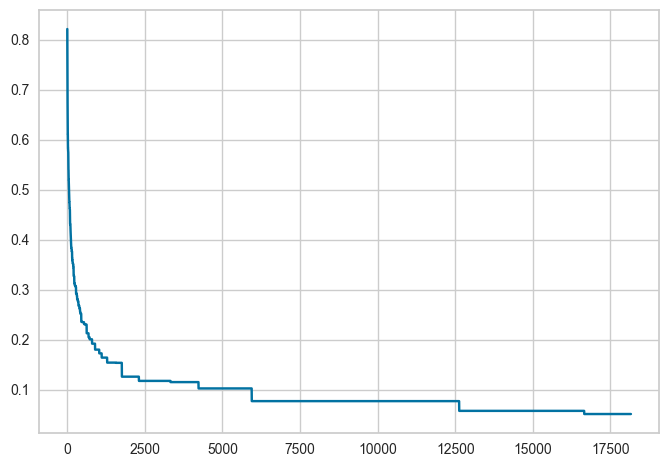

DBSCAN


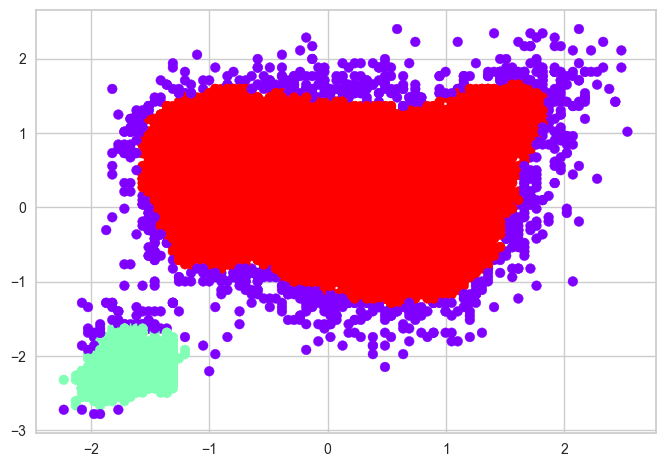

HDBSCAN


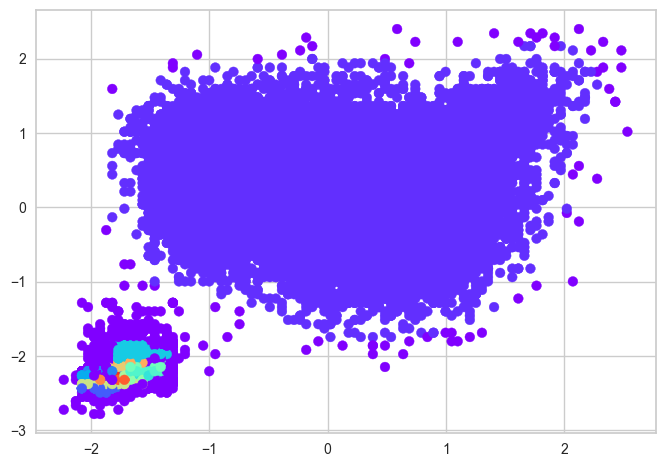

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
print("DBSCAN search eps")
ns=50 # the minimum number of neighbors
nbrs = NearestNeighbors(n_neighbors=ns).fit(myData)
distances, indices = nbrs.kneighbors(myData)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plot = plt.plot(list(range(1,myData.shape[0]+1)), distanceDec);
plt.show(plot)

#i will pick 0.1

print("DBSCAN")
dbscan = DBSCAN(eps=0.15,min_samples=50)
dbscan.fit(myData)
plot2 = plt.scatter(myData[:,0],myData[:,1], c=dbscan.labels_, cmap='rainbow')
plt.show(plot2)

print("HDBSCAN")
import hdbscan
hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=30, gen_min_span_tree=True)
hdbscanModel.fit(myData)
plot3 = plt.scatter(myData[:,0],myData[:,1], c=hdbscanModel.labels_, cmap='rainbow')


**<span style='background:yellow'>\<how do the results compare when using the unadjusted data?></span>**
i dont think that much changes other than the fact that all HCA model except single seem to work better than before. for example the best number of clusters for average changed from 3 to 2 and also ward work with 2, 3 and 4 now

<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template for those chapters is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 2. Improved Visualisation

The basic scatterplot can become a big blur, especially when you have a lot of datapoints.

*note: you can also use the clusterable_data.npy or another dataset, but it has to be one with a LOT of datapoints*

In [33]:
# code to load dataset if not already loaded
dataset = np.load('clusterable_data.npy')
dataframe = pd.DataFrame(dataset, columns=['x', 'y'])
dataframe.head()


,x,y
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


If we create a scatterplot of **<span style='background:yellow'>\<your first choosen variable></span>** and **<span style='background:yellow'>\<your second choosen variable></span>**
i will use the same dataset as before

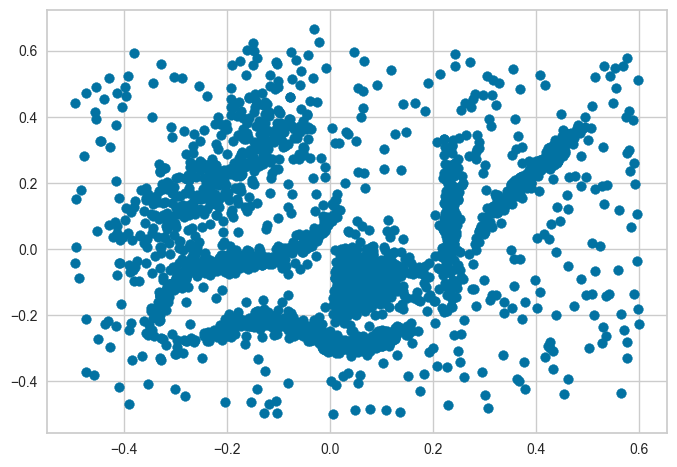

In [34]:
# code to create the basic scatterplot
plt.scatter(dataframe['x'], dataframe['y'])


It looks like a big blur.

One technique to overcome this, is to use opacity. See for an example: https://i2.wp.com/cmdlinetips.com/wp-content/uploads/2019/04/Scatter_Plot_transparent_with_log_scale_Seaborn_Python.jpeg

Here's a function that can create the scatterplot like this, for a given model and dataset.

In [47]:
# code of a function that takes the data as input and shows the scatterplot with the opacity. The level of opacity can also be a parameter.
import seaborn as sns

def scatter_plot_with_opacity(data,x_string,y_string, opacity_level):
    plt.scatter(data[x_string], data[y_string], alpha=opacity_level)
    plt.xlabel(x_string)
    plt.ylabel(y_string)
    plt.show()



This is a simple function that takes the data as input and shows the scatterplot with the opacity. The level of opacity is be a parameter.

Here's an example of using the function:

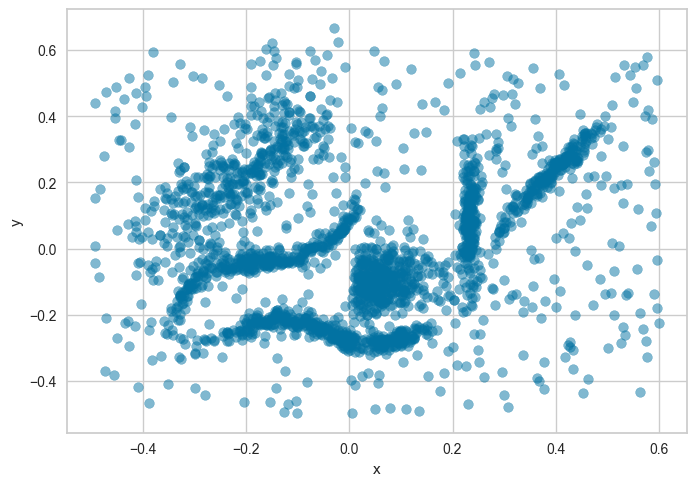

In [48]:
# code using the function to show the scatterplot with opacity.
scatter_plot_with_opacity(dataframe,"x" , "y",0.5)

In this plot, the opacity is set to 0.5. you can clearly see that single datapoint are partialy see through.  ut the ore dense areas are the most blue.

Another method to deal with even larger datasets is a heatmap. An example is shown below.

![image heatmap](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRvQZGu7SMVBCh6KIcF7toUqRpak2qWwQNkkhpZzv30hFbwYdDk&usqp=CAU)

This usually requires a Gaussian kernel, and is often slower than the previous methods.

So lets create a function for this as well.

In [51]:
# code of a function that takes the data as input and shows the scatterplot as a heatmap. The color scaling could be an optional parameter.
def scatter_plot_with_heatmap(data,x_string,y_string, opacity_level):
    # create the heatmap using the histplot and kdeplot functions from Seaborn
    sns.histplot(data=data, x=x_string, y=y_string, bins=100, cmap='Reds', cbar=True)
    sns.kdeplot(data=data, x=x_string, y=y_string, levels=5, color='w', linewidths=4)
    # set the opacity level of the heatmap using the set_alpha function
    plt.gca().collections[0].set_alpha(opacity_level)
    # set the x and y axis labels
    plt.xlabel(y_string)
    plt.ylabel(y_string)
    plt.show()

for this function i used the histplot and kdeplot functions from Seaborn. i also used the set_alpha function to set the opacity level of the heatmap. the histplot function is used to create the heatmap and the kdeplot function is used to create the contour lines. then mathplotlib is used to set the x and y axis labels and show the plot.

Here's an example of using the function:

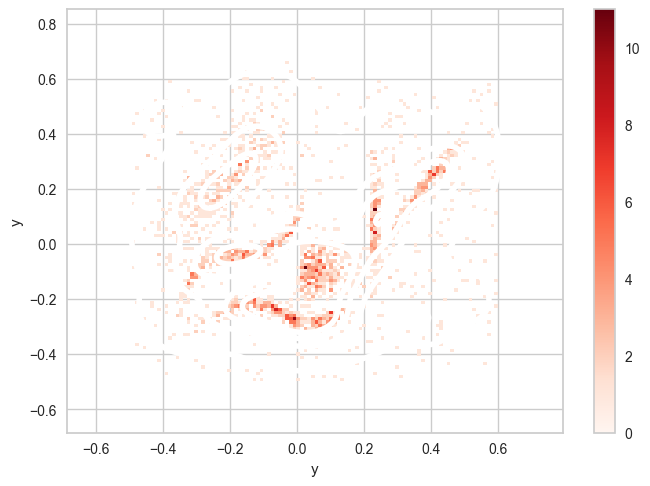

In [52]:
# code using the function to show the heatmap.
scatter_plot_with_heatmap(dataframe,"x" , "y",1)

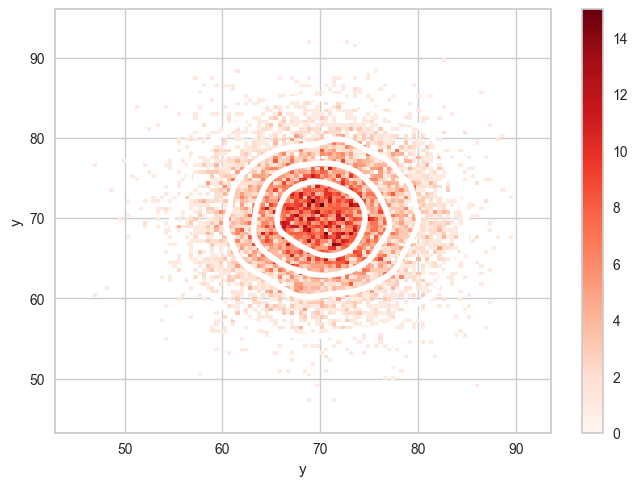

In [53]:
# generate some random data
np.random.seed(1234)
n = 10000
data = pd.DataFrame({
    'x': np.random.normal(loc=70, scale=6, size=n),
    'y': np.random.normal(loc=70, scale=6, size=n)
})

scatter_plot_with_heatmap(data,"x" , "y",1)

For this example is used a dataset whit most points in the center.You can see that the center of the heatmap is a lichter tone of red that the outer ring of the heatmap. this is because the center is more dense than the outer ring.

# 3. A New Technique

In the Jupyter Notebook from the lecture, we discussed quite a few techniques:

* k-means (with Lloyd and Elkan)
* k-means++ (with Lloyd and Elkan)
* HCA Single linkage
* HCA Complete linkage
* HCA Mean linkage
* HCA Ward linkage
* DBSCAN
* HDBSCAN*

In the appendix there was also:

* Affinity Propagation
* Spectral Clustering
* Mini-batch K-means
* k-medoids
* HCA Centroid linkage
* HCA Median linkage
* Mean Shift
* OPTICS

However, as shown on the slides (near the end) there are a lot more. 

In this chapter the **<span style='background:yellow'>\<your chosen technique that is not listed above></span>** is discussed.Gaussian Mixture Model

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? How is it compared to the other techniques discussed? You probably need a few cells for this></span>**
Gaussian Mixture Model is a classification model that related to kmeans. Gaussian Mixture Model (GMM) is an algorithm that also tries to find clusters in the data, but it does this in a slightly different way than K-means. GMM assumes that the data points come from a mixture of several Gaussian distributions(this is where the name comes from, i had to google it. turns out its the normal distribution), and it tries to estimate the parameters of these Gaussian distributions to fit the data. while K-means tries to find clusters by assigning each data point to the closest cluster center based on the distance between the point and the center

In [40]:
# code to create and fit the model (perhaps another dataset is also required?)
from sklearn.mixture import GaussianMixture

data = np.load('clusterable_data.npy')
# create an instance of GaussianMixture with n_components equal to the desired number of clusters
n_clusters = 5
model = GaussianMixture(n_components=n_clusters)

# fit the model to the data
model.fit(data)

# get the labels of the clusters
labels = model.predict(data)

C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


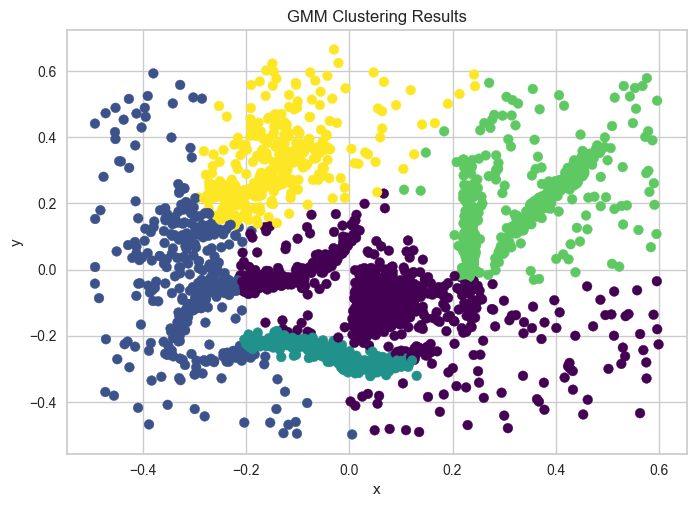

In [41]:
# code to show the result
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

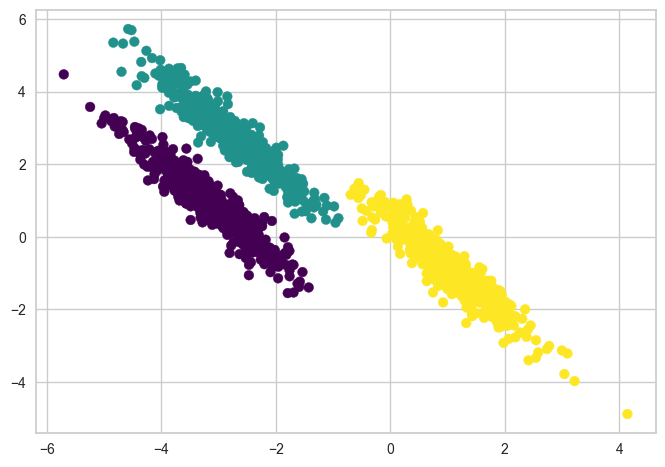

In [42]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=1500, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X, transformation)

plt.scatter(aniso[:, 0], aniso[:, 1], c=y, cmap='viridis')


C:\Users\jaimy\anaconda3\envs\statsclustering\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


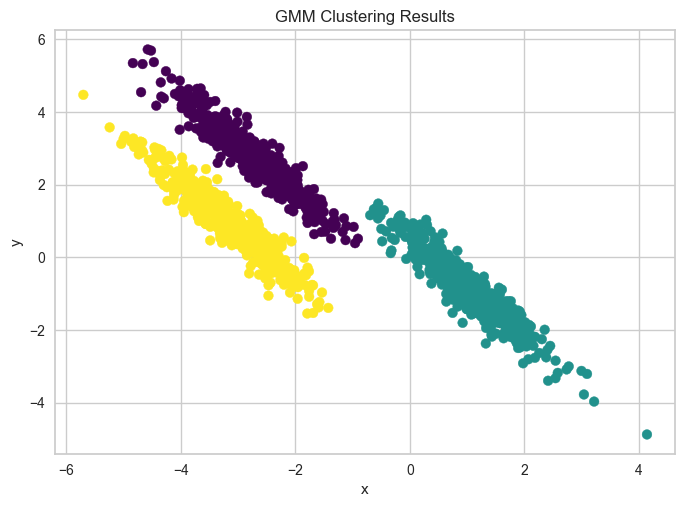

In [43]:
n_clusters = 3
model = GaussianMixture(n_components=n_clusters)

# fit the model to the data
model.fit(aniso)

# get the labels of the clusters
labels = model.predict(aniso)

# code to show the result
plt.scatter(aniso[:, 0], aniso[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

I would say that the results are pretty good. The clusters are pretty well defined for both datasets, however this method does not account for outliers and noice and i do think that the first dataset hase some noice an outliers. but those can not be found using this model, becouse just as kmeans this model does not account for those and every datapoint get assigned to a cluster.

# 4. Categorical Data

As with the clustering, the categorical data is a special case. In this chapter we'll describe one way to cluster using categorical data.

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? You probably need a few cells for this></span>**

In [44]:
# code to create and fit the model (perhaps another dataset is also required?)


In [45]:
# code to show the result in a scatterplot with the clusters.


# 5. Elbow as a Number
The elbowPlot gives a nice visual tool. But I'd like to have the resulting k-value as a number, so I can use it as an input parameter for some loops over different models.

I couldn't find a method to extract the result from the KElbowVisualizer. So we'll have to create something ourselves. Perhaps 'from kneed import KneeLocator' can help here...

Below is a function that will find the knee/elbow point for each of the three metrics, and returns the results as an array.